## **Exploration des relevés de données des bâtiments**

**Anticipez les besoins en consommation électrique de bâtiments**

Lien vers consignes : https://openclassrooms.com/fr/projects/629/assignment

Lien vers données : https://www.kaggle.com/city-of-seattle/sea-building-energy-benchmarking#2015-building-energy-benchmarking.csv

Lien vers score Star Energy : https://www.energystar.gov/buildings/facility-owners-and-managers/existing-buildings/use-portfolio-manager/interpret-your-results/what

Lien vers la signification des colonnes (trouvé via recherche web) : https://data.seattle.gov/dataset/2016-Building-Energy-Benchmarking/2bpz-gwpy

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# import des principales bibliothèques 
from matplotlib import pyplot as plt
import seaborn as sns
import time 
from datetime import datetime
import pandas as pd
import os
sns.set()
import numpy as np
from sklearn import decomposition
from sklearn import preprocessing
from matplotlib.patches import FancyArrowPatch
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore")
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from pandas.core.groupby.generic import DataFrameGroupBy
import folium
from statsmodels.formula.api import ols
from geopy.distance import geodesic


##I- Chargement des données

In [ ]:
# 
path = "/content/gdrive/My Drive/P3/2016-building-energy-benchmarking.csv"
data_build = pd.read_csv(path)

**Dimension du dataset**

In [ ]:
data_build.shape

(3376, 46)

**Les columns du dataset**

In [ ]:
data_build.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'Address', 'City', 'State', 'ZipCode',
       'TaxParcelIdentificationNumber', 'CouncilDistrictCode', 'Neighborhood',
       'Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'DefaultData', 'Comments', 'ComplianceStatus',
       'Outlier

**Type des variables**

In [ ]:
data_build.dtypes

OSEBuildingID                        int64
DataYear                             int64
BuildingType                        object
PrimaryPropertyType                 object
PropertyName                        object
Address                             object
City                                object
State                               object
ZipCode                            float64
TaxParcelIdentificationNumber       object
CouncilDistrictCode                  int64
Neighborhood                        object
Latitude                           float64
Longitude                          float64
YearBuilt                            int64
NumberofBuildings                  float64
NumberofFloors                       int64
PropertyGFATotal                     int64
PropertyGFAParking                   int64
PropertyGFABuilding(s)               int64
ListOfAllPropertyUseTypes           object
LargestPropertyUseType              object
LargestPropertyUseTypeGFA          float64
SecondLarge

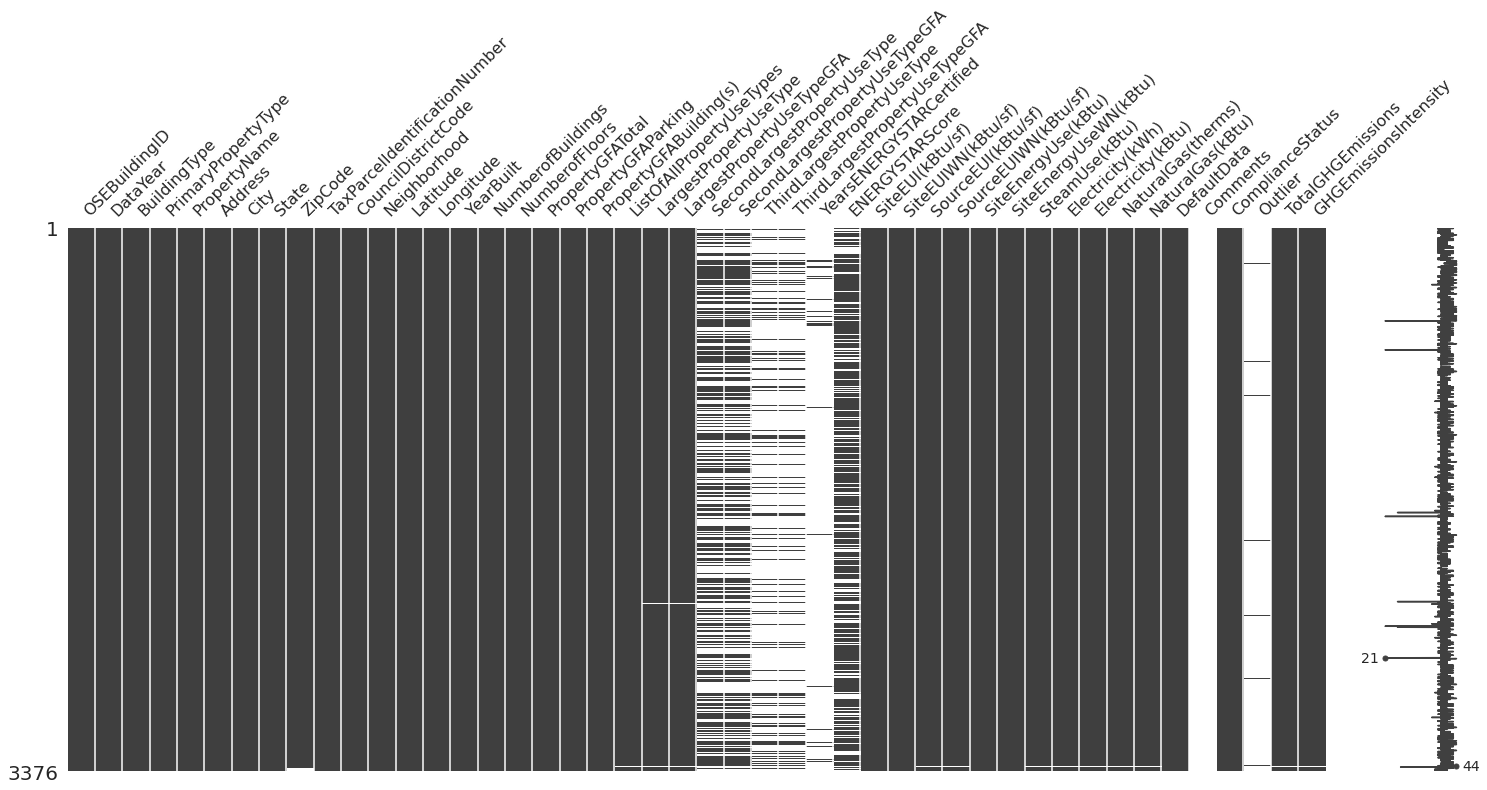

In [ ]:
import missingno as msno
msno.matrix(data_build)

**1- selection de certaines variables**

In [ ]:

# selection de certaines variables
data=data_build.copy()
data=data[['BuildingType', 'YearBuilt','LargestPropertyUseType','PrimaryPropertyType',
           'NumberofFloors','NumberofBuildings',
           'PropertyGFATotal','Latitude','Longitude','ENERGYSTARScore','SiteEnergyUseWN(kBtu)','TotalGHGEmissions']]
data=pd.concat([data.select_dtypes('object'),data.select_dtypes('int64'),data.select_dtypes('float')],axis=1)
data=data.dropna()
data


,BuildingType,LargestPropertyUseType,PrimaryPropertyType,YearBuilt,NumberofFloors,PropertyGFATotal,NumberofBuildings,Latitude,Longitude,ENERGYSTARScore,SiteEnergyUseWN(kBtu),TotalGHGEmissions
0,NonResidential,Hotel,Hotel,1927,12,88434,1.0,47.61220,-122.33799,60.0,7.456910e+06,249.98
1,NonResidential,Hotel,Hotel,1996,11,103566,1.0,47.61317,-122.33393,61.0,8.664479e+06,295.86
2,NonResidential,Hotel,Hotel,1969,41,956110,1.0,47.61393,-122.33810,43.0,7.393711e+07,2089.28
3,NonResidential,Hotel,Hotel,1926,10,61320,1.0,47.61412,-122.33664,56.0,6.946800e+06,286.43
4,NonResidential,Hotel,Hotel,1980,18,175580,1.0,47.61375,-122.34047,75.0,1.465650e+07,505.01
...,...,...,...,...,...,...,...,...,...,...,...,...
3357,Multifamily MR (5-9),Multifamily Housing,Mid-Rise Multifamily,2015,7,208136,1.0,47.55976,-122.38320,100.0,3.552185e+06,96.90
3358,Multifamily LR (1-4),Multifamily Housing,Low-Rise Multifamily,2014,4,20246,1.0,47.61791,-122.30230,99.0,7.952111e+05,18.88
3366,Nonresidential COS,Office,Office,1952,1,13661,1.0,47.63572,-122.37525,75.0,5.585251e+05,3.50
3369,Nonresidential COS,Office,Office,1960,1,15398,1.0,47.56440,-122.27813,93.0,4.141724e+05,7.79


 ## II- Analyses descriptives 

**II-1 Cartographie des données avec Folium**

On  visualise des  residences avec folium en utlisant une bibliothèques de traitement de données géographiques par carte Folium avec laquelle on a accès à une masse d'informations permettant de visualiser des location des positions (ici residences) sur une carte.



In [ ]:
dat_n=data.loc[data['BuildingType'].isin(['NonResidential','Nonresidential COS','Nonresidential WA']),:]
map = folium.Map(location=[47.6205, -122.351], zoom_start=10) # Seattle location
fille =dat_n[['Latitude','Longitude']]
loc_list = fille.values.tolist()
for point in range(0, len(loc_list)):
    folium.Marker(loc_list[point]).add_to(map)
map


On observe une concentration de bâtiments non-résidentiels dans le centre-ville de Seattle. Cela s'explique par le fait que beaucoup de bâtiments non-résidentiels sont des bureaux. Les bâtiments qui se situent en dehors du centre-ville (ou Downtown) vont être des entrepôts, des campus ou encore des hôpitaux.

**II-2 Analyse univariée**

* **Distribution des variables catégorielles**

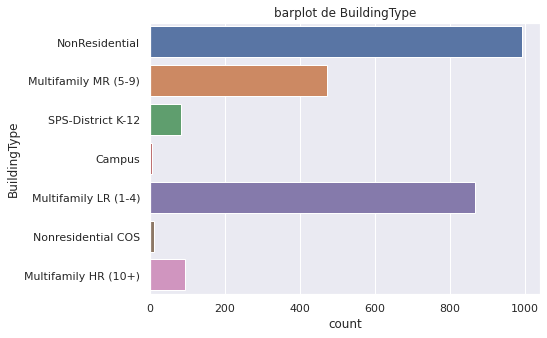

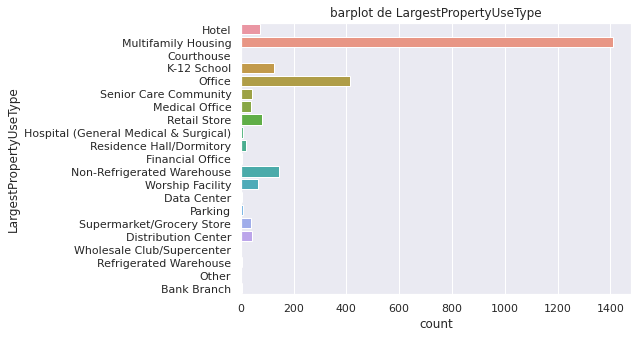

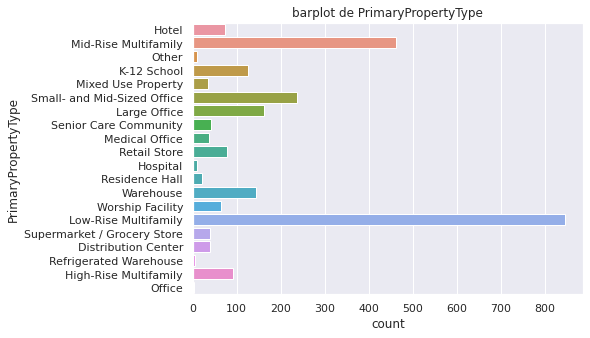

In [ ]:
for col in data.select_dtypes('object'):
    plt.figure(figsize=(7,5))
    sns.countplot(y=data[col])
    #data[col].value_counts().plot.bar()
    plt.title('barplot de '+col)
    plt.show()

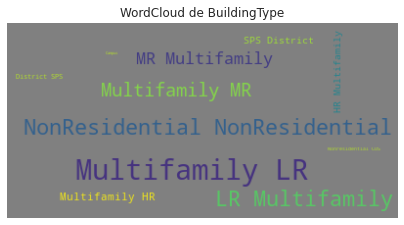

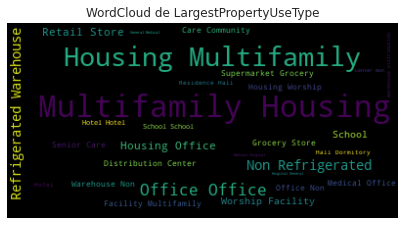

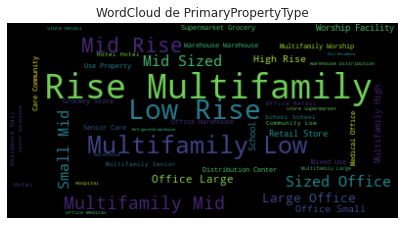

In [ ]:
colums=data.select_dtypes('object').columns
for col in colums:
  text = " ".join(i for i in data[col])
  stopwords = set(STOPWORDS)
  colour=['grey','black','black','grey']
  wordcloud = WordCloud(stopwords=stopwords, background_color=colour[colums.get_loc(col)]).generate(text)
  default_colors = wordcloud.to_array()
  plt.figure( figsize=(7,5))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.title('WordCloud de '+ col)
  plt.show() 


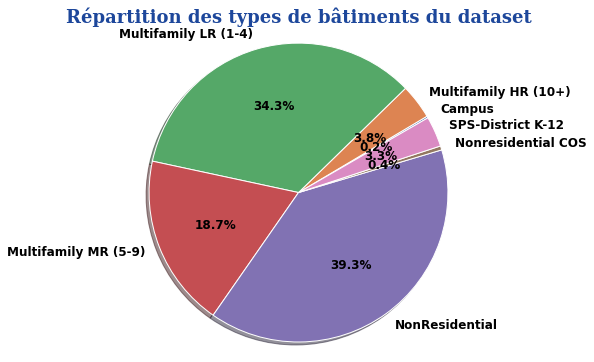

In [ ]:
data1=data
data1['OSEBuildingID']=data_build['OSEBuildingID']
building_type = data1.groupby(by='BuildingType')['OSEBuildingID'].nunique()
font_title = {'family': 'serif',
              'color':  '#1d479b',
              'weight': 'bold',
              'size': 18,
             }

fig, ax = plt.subplots(figsize=(6,6))
ax.pie(building_type.values, labels=building_type.index, 
       autopct='%1.1f%%', shadow=True, startangle=30,
       textprops=dict(color="black",size=12, weight="bold"))
ax.axis('equal')
ax.set_title("Répartition des types de bâtiments du dataset", fontdict=font_title)
plt.show()

* **Distribution des variables quantitatives**

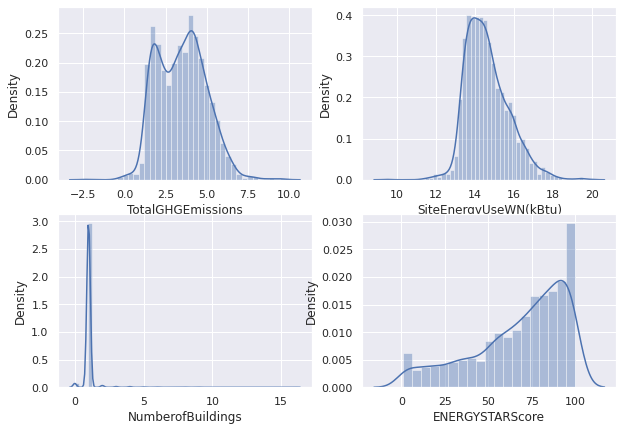

In [ ]:
dat=data[['TotalGHGEmissions','SiteEnergyUseWN(kBtu)']]
dat=dat[dat['SiteEnergyUseWN(kBtu)']>0]
dat=dat[dat['TotalGHGEmissions']>0]
dat1=data[['NumberofBuildings', 'ENERGYSTARScore']]

colums=dat.columns
colums1=dat1.columns
plt.figure(figsize=(10,7))
for col in dat.columns :
  plt.subplot(2,2,(colums.get_loc(col)+1))
  sns.distplot(np.log(dat[col]))
  #plt.title('distrib de' + col )  
for col1 in dat1.columns :
  plt.subplot(2,2,(colums1.get_loc(col1)+3))
  sns.distplot((dat1[col1]))
  #plt.title('distrib de' + col1 )
  

**Test de kolmogorov Smirnov**

In [ ]:
df1=data.loc[data['BuildingType'].isin(['NonResidential']),:]
dat=df1[['TotalGHGEmissions','SiteEnergyUseWN(kBtu)']]
from scipy import stats
t1=stats.kstest((dat['SiteEnergyUseWN(kBtu)']), 'norm')
t2=stats.kstest((dat['TotalGHGEmissions']), 'norm')
Test=pd.DataFrame({"Variables":['TotalGHGEmissions','SiteEnergyUseWN(kBtu)'],"Statistic/Test":[t2[0],t1[0]],"P-value":[t2[1],t1[1]]})
Test

,Variables,Statistic/Test,P-value
0,TotalGHGEmissions,0.967629,0.0
1,SiteEnergyUseWN(kBtu),0.993952,0.0


P-values de test inferieures à 5%,donc les deux varibles à prédire ne suivent pas une loi normale

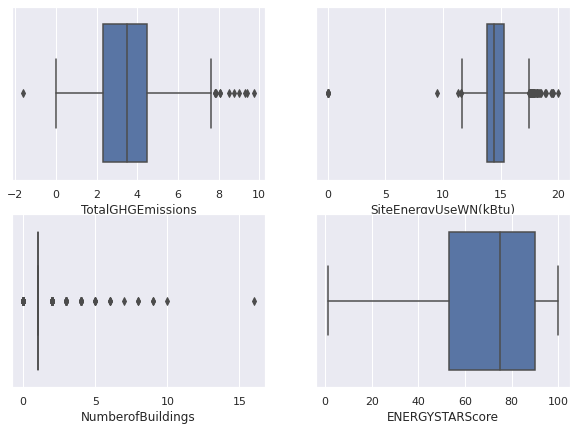

In [ ]:
dat=data[['TotalGHGEmissions','SiteEnergyUseWN(kBtu)']]
dat1=data[['NumberofBuildings', 'ENERGYSTARScore']]
colums=dat.columns
colums1=dat1.columns
plt.figure(figsize=(10,7))
for col in dat.columns :
  plt.subplot(2,2,(colums.get_loc(col)+1))
  sns.boxplot(np.log(dat[col]+1))
  #plt.title('boxplot de' + col )  
for col1 in dat1.columns :
  plt.subplot(2,2,(colums1.get_loc(col1)+3))
  sns.boxplot((dat1[col1]))
  #plt.title('boxplot de' + col1 )

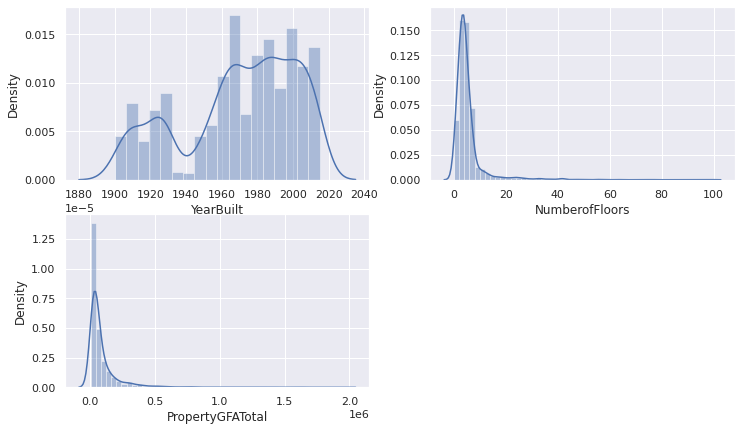

In [ ]:
dat=data[['YearBuilt', 'NumberofFloors', 'PropertyGFATotal']] 
colums=dat.columns
plt.figure(figsize=(12,7))
for col in dat.columns :
  plt.subplot(2,2,(colums.get_loc(col)+1))
  sns.distplot((dat[col]))
  #plt.title('distrib de' + col )

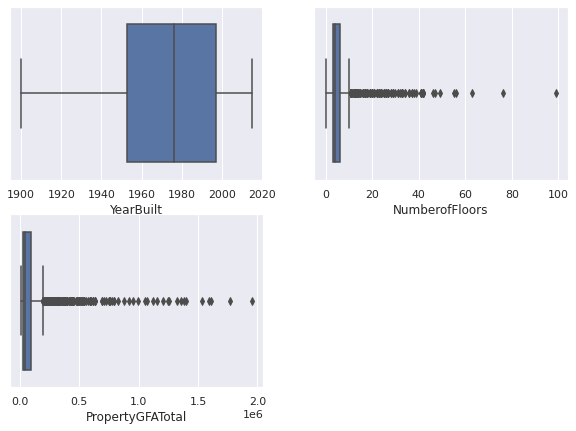

In [ ]:
dat=data[['YearBuilt', 'NumberofFloors', 'PropertyGFATotal']] 
colums=dat.columns
plt.figure(figsize=(10,7))
for col in dat.columns :
  plt.subplot(2,2,(colums.get_loc(col)+1))
  sns.boxplot((dat[col]))
  #plt.title('distrib de' + col )

**II-3 Analyse multivariée**

On s'interesse uniquement au modalité non residentiel sur le type de construction.

In [ ]:

df=data.loc[data['BuildingType'].isin(['NonResidential','Nonresidential COS','Nonresidential WA']),:]


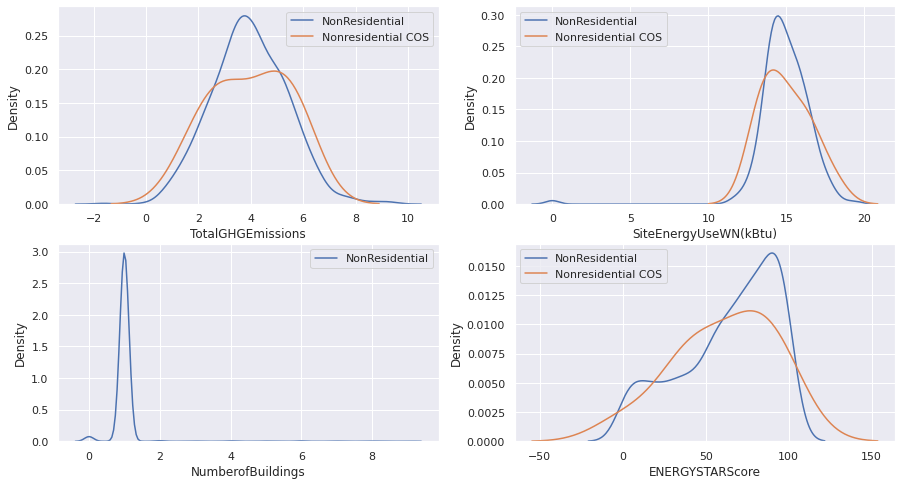

In [ ]:
dat=data[['TotalGHGEmissions','SiteEnergyUseWN(kBtu)']]
dat1=data[['NumberofBuildings', 'ENERGYSTARScore']]
colums=dat.columns
colums1=dat1.columns
plt.figure(figsize=(15,8))
for col in dat.columns :
  plt.subplot(2,2,(colums.get_loc(col)+1))
  for g in df['BuildingType'].unique():
        df2=df.loc[df['BuildingType'].str.contains(g, na=False,case=False)]
        sns.distplot(np.log(df2[col]+1),label=g,hist=False)
        plt.legend()
  #plt.title('distrib de' + col ) 
for col1 in dat1.columns :
  plt.subplot(2,2,(colums1.get_loc(col1)+3))
  for g in df['BuildingType'].unique():
        df3=df.loc[df['BuildingType'].str.contains(g, na=False,case=False)]
        sns.distplot(df3[col1],label=g,hist=False) 
        plt.legend()


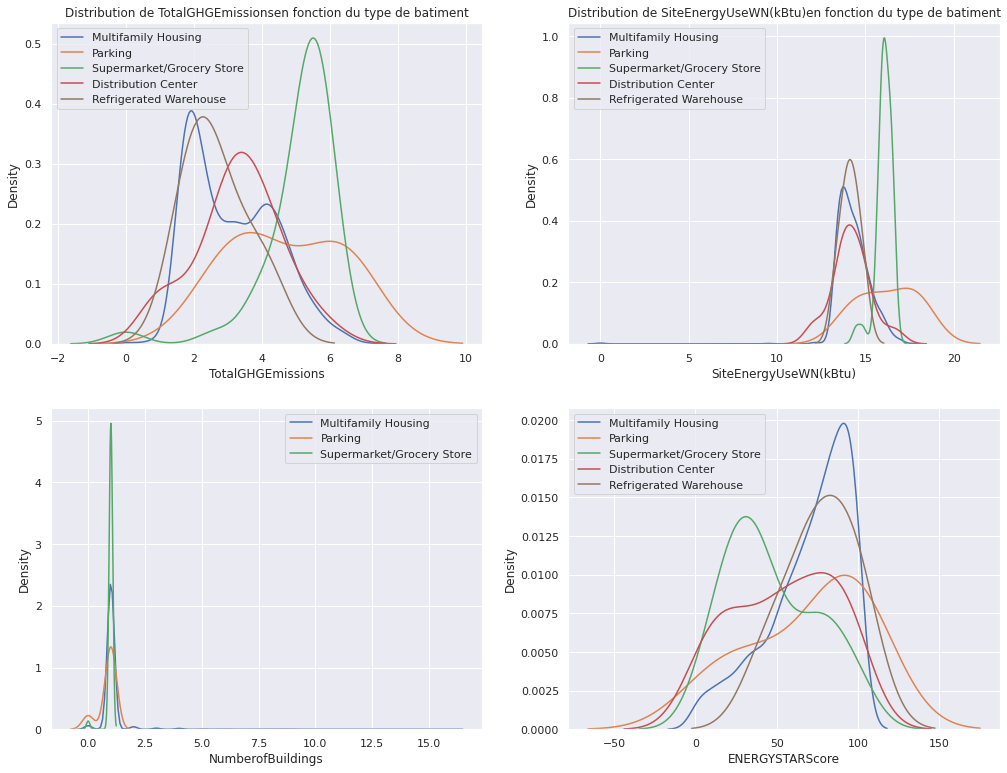

In [ ]:
df=data.loc[data['LargestPropertyUseType'].isin(['Parking', 'Supermarket/Grocery Store', 'Distribution Center',
       'Wholesale Club/Supercenter', 'Refrigerated Warehouse', 'Other',
       'Multifamily Housing']),:]
dat=data[['TotalGHGEmissions','SiteEnergyUseWN(kBtu)']]
dat1=data[['NumberofBuildings', 'ENERGYSTARScore']]
colums=dat.columns
colums1=dat1.columns
plt.figure(figsize=(17,13))
for col in dat.columns :
  plt.subplot(2,2,(colums.get_loc(col)+1))
  for g in df['LargestPropertyUseType'].unique():
        df2=df.loc[df['LargestPropertyUseType'].str.contains(g, na=False,case=False)]
        sns.distplot(np.log(df2[col]+1),label=g,hist=False)
        plt.legend()
        plt.title('Distribution de '+col+'en fonction du type de batiment')
  #plt.title('distrib de' + col ) 
for col1 in dat1.columns :
  plt.subplot(2,2,(colums1.get_loc(col1)+3))
  for g in df['LargestPropertyUseType'].unique():
        df3=df.loc[df['LargestPropertyUseType'].str.contains(g, na=False,case=False)]
        sns.distplot(df3[col1],label=g,hist=False) 
        plt.legend()


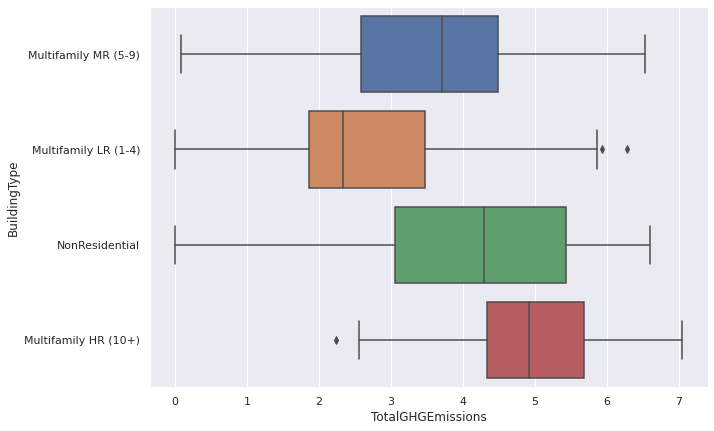

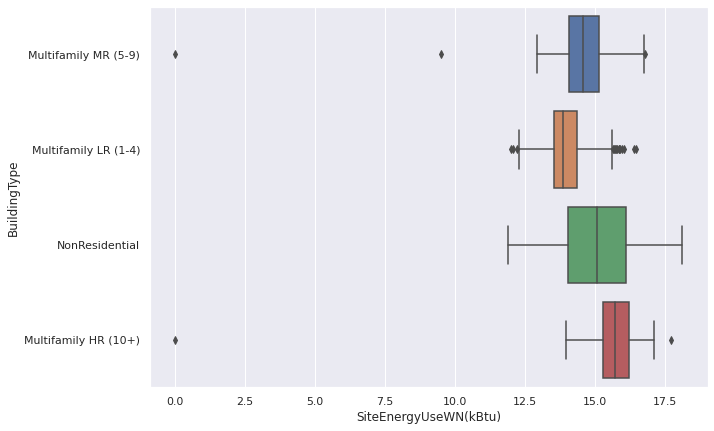

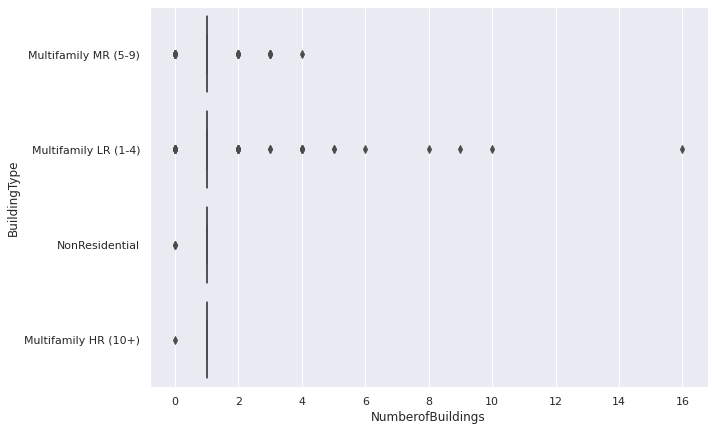

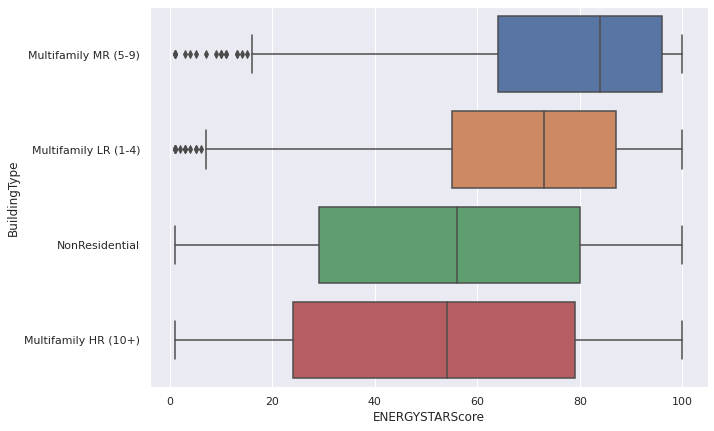

In [ ]:
dat=data[['TotalGHGEmissions','SiteEnergyUseWN(kBtu)']]
dat1=data[['NumberofBuildings', 'ENERGYSTARScore']]
colums=dat.columns
#colums1=dat1.columns
#plt.figure(figsize=(20,12))
for col in dat.columns :
  plt.figure(figsize=(10,7))
  #plt.subplot(2,2,(colums.get_loc(col)+1))
  sns.boxplot(x=np.log(df[col]+1),y='BuildingType',data=df)
for col1 in dat1.columns :
  plt.figure(figsize=(10,7))
  #plt.subplot(2,2,(colums1.get_loc(col1)+3))
  sns.boxplot(x=df[col1],y='BuildingType',data=df)
  
        


Text(0.5, 1.0, 'Relation entre les émissions de CO2 et le type de batimment')

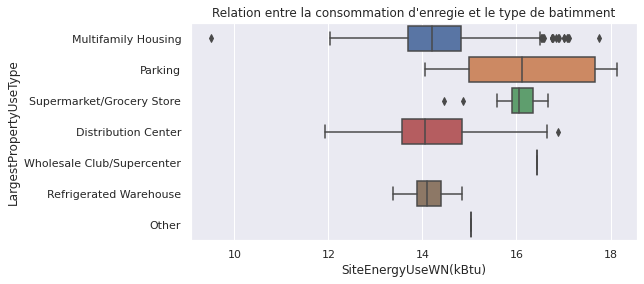

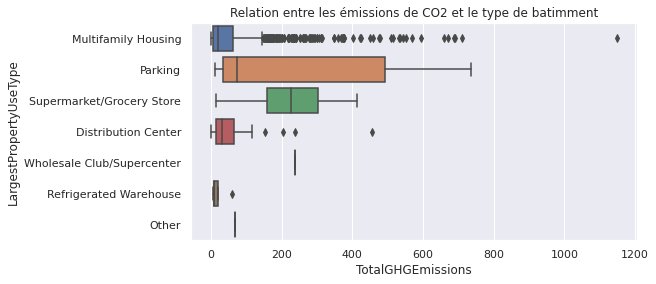

In [ ]:
df=data.loc[data['LargestPropertyUseType'].isin(['Parking', 'Supermarket/Grocery Store', 'Distribution Center',
       'Wholesale Club/Supercenter', 'Refrigerated Warehouse', 'Other',
       'Multifamily Housing']),:]
df=df[df['TotalGHGEmissions']>0]
df=df[df['SiteEnergyUseWN(kBtu)']>0]       
dat=data[['TotalGHGEmissions','SiteEnergyUseWN(kBtu)']]
dat1=data[['NumberofBuildings', 'ENERGYSTARScore']]

colums=dat.columns
colums1=dat1.columns

#for col in dat.columns :
plt.figure(figsize=(8,4))
sns.boxplot(x=np.log(df['SiteEnergyUseWN(kBtu)']),y='LargestPropertyUseType',data=df)
plt.title("Relation entre la consommation d'enregie et le type de batimment")
plt.figure(figsize=(8,4))
sns.boxplot(x=df['TotalGHGEmissions'],y='LargestPropertyUseType',data=df)
plt.title("Relation entre les émissions de CO2 et le type de batimment")

  #plt.subplot(2,2,(colums.get_loc(col)+1))
  #sns.boxplot(x=np.log(df[col]+1),y='LargestPropertyUseType',data=df)


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


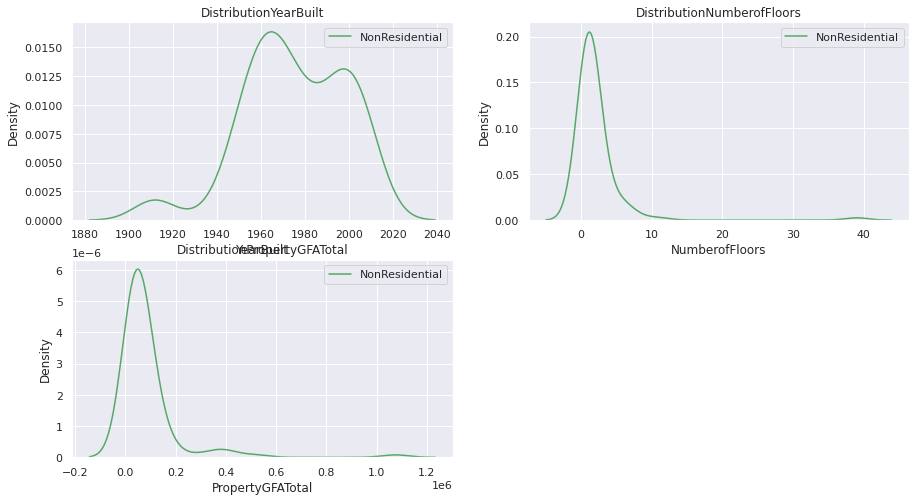

In [ ]:
dat=df[['YearBuilt', 'NumberofFloors', 'PropertyGFATotal']] 
colums=dat.columns
plt.figure(figsize=(15,8))
for col in dat.columns :
  plt.subplot(2,2,(colums.get_loc(col)+1))
  for g in df['BuildingType'].unique():
        df2=df.loc[df['BuildingType'].str.contains(g, na=False,case=False)]
        sns.distplot((df2[col]),label=g,hist=False)
        plt.legend()
        plt.title("Distribution" + col)
 

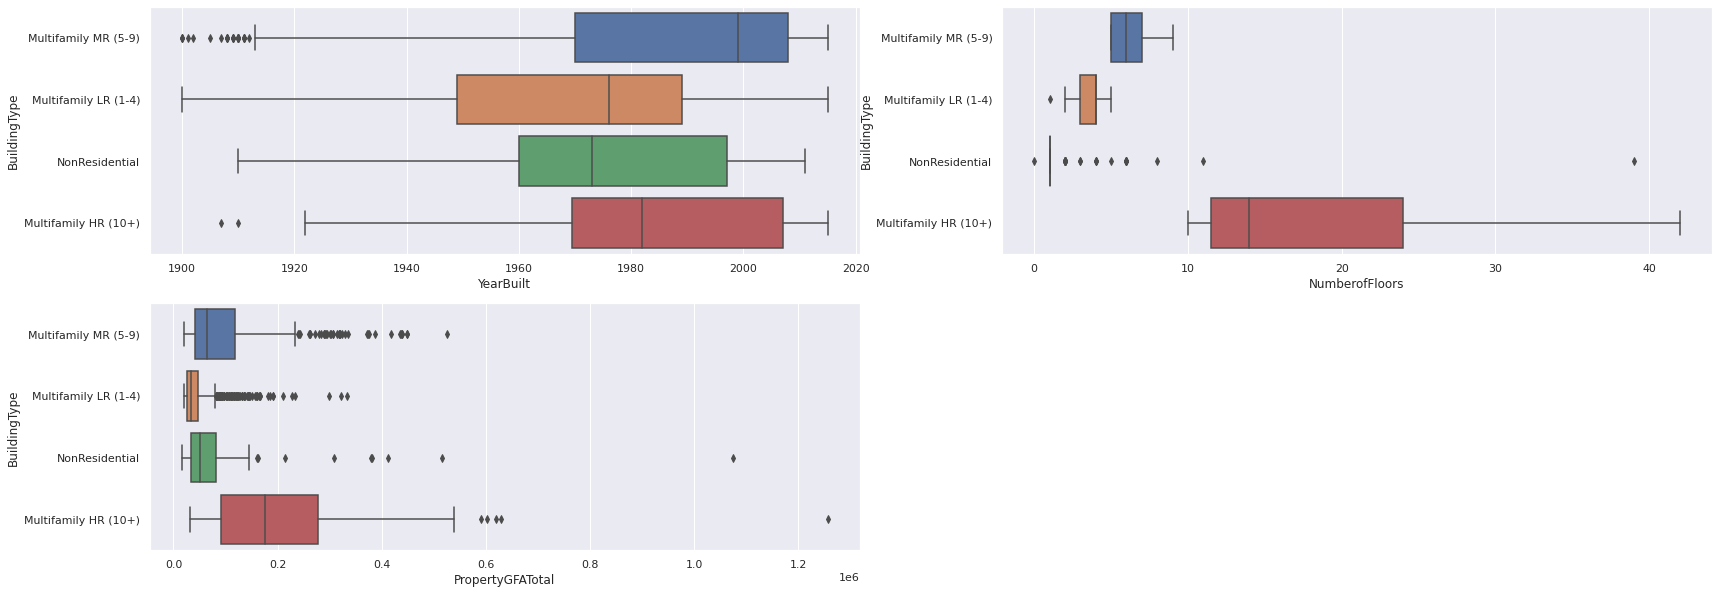

In [ ]:
dat=df[['YearBuilt', 'NumberofFloors', 'PropertyGFATotal']] 
colums=dat.columns
plt.figure(figsize=(28,10))
for col in dat.columns :
  plt.subplot(2,2,(colums.get_loc(col)+1))
  sns.boxplot(x=(df[col]),y='BuildingType',data=df)

**Corrélation des variables**

In [ ]:
data=data.drop('OSEBuildingID',axis=1)
data.corr()

,YearBuilt,NumberofFloors,PropertyGFATotal,NumberofBuildings,Latitude,Longitude,ENERGYSTARScore,SiteEnergyUseWN(kBtu),TotalGHGEmissions
YearBuilt,1.000000,0.138223,0.200091,0.032611,0.110575,-0.066888,0.030982,0.062866,0.021936
NumberofFloors,0.138223,1.000000,0.677345,-0.011900,-0.041273,-0.022289,0.025793,0.311697,0.155067
PropertyGFATotal,0.200091,0.677345,1.000000,0.129873,-0.048850,0.013032,0.067768,0.574266,0.413799
NumberofBuildings,0.032611,-0.011900,0.129873,1.000000,0.071553,0.026339,-0.005025,0.253870,0.288642
Latitude,0.110575,-0.041273,-0.048850,0.071553,1.000000,0.003875,0.079499,-0.042771,-0.034650
Longitude,-0.066888,-0.022289,0.013032,0.026339,0.003875,1.000000,-0.026870,0.031638,0.037143
ENERGYSTARScore,0.030982,0.025793,0.067768,-0.005025,0.079499,-0.026870,1.000000,-0.090161,-0.101685
SiteEnergyUseWN(kBtu),0.062866,0.311697,0.574266,0.253870,-0.042771,0.031638,-0.090161,1.000000,0.923036
TotalGHGEmissions,0.021936,0.155067,0.413799,0.288642,-0.034650,0.037143,-0.101685,0.923036,1.000000


* **Matrice des corrélations des variables continues**

Text(0.5, 1.0, 'Matrice des corrélations des variables continues ')

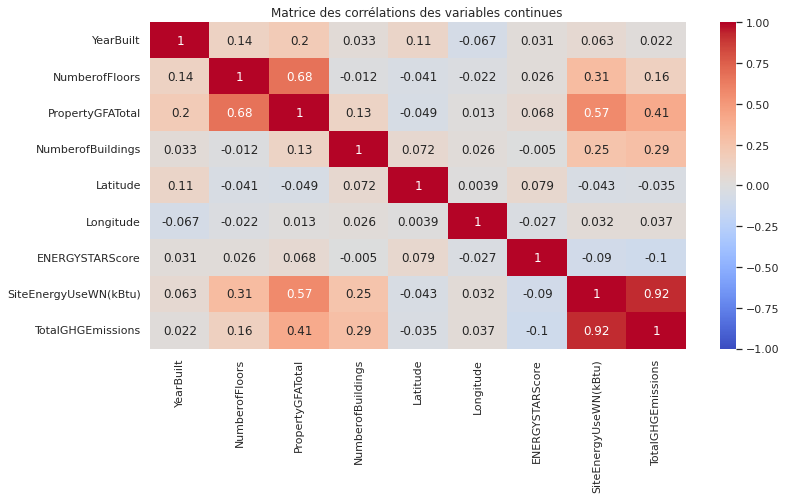

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True,cmap="coolwarm")
plt.title('Matrice des corrélations des variables continues ')


On observe une Corrélation importante entre TotalGHEmissions et SiteEnergyUseWN(kBtu).On notera que ce sont les deux variables qu'on cherche à prédire

**Test de pearsonr sur la corrélation des variables**

In [ ]:
from scipy.stats import pearsonr
df2=data.select_dtypes('float')
a = np.empty((len(df2.columns),len(df2.columns),))
for i in range(0,len(df2.columns)):
    for j in range(0,len(df2.columns)):
      a[i,j] = pearsonr(df2.iloc[:,i], df2.iloc[:,j])[1]

df_pvalue = round(pd.DataFrame(a, columns=df2.columns, index = df2.columns),5)
cm = sns.light_palette("green", as_cmap=True) 
df_pvalue.\
style.background_gradient(cmap=cm).set_precision(3)

,NumberofBuildings,Latitude,Longitude,ENERGYSTARScore,SiteEnergyUseWN(kBtu),TotalGHGEmissions
NumberofBuildings,0.000,0.000,0.186,0.801,0.000,0.000
Latitude,0.000,0.000,0.846,0.000,0.032,0.082
Longitude,0.186,0.846,0.000,0.177,0.112,0.062
ENERGYSTARScore,0.801,0.000,0.177,0.000,0.000,0.000
SiteEnergyUseWN(kBtu),0.000,0.032,0.112,0.000,0.000,0.000
TotalGHGEmissions,0.000,0.082,0.062,0.000,0.000,0.000


**BuildingType vs LargestPropertyUseType** 

Text(0.5, 1.0, 'corrrélation entre pnns_groups_1 et TotalGHGEmissions ')

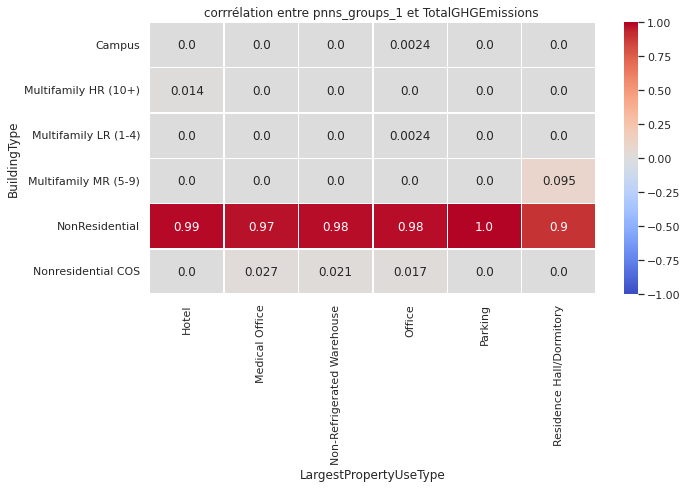

In [ ]:
df1=data.loc[data['LargestPropertyUseType'].isin(['Hotel', 'Office',  'Residence Hall/Dormitory',
       'Parking', 'Non-Refrigerated Warehouse', 'Medical Office']),:]
heat1 =df1.groupby(['BuildingType', 'LargestPropertyUseType'])['LargestPropertyUseType'].count().reset_index(name='counts')
fl = heat1.pivot("BuildingType", "LargestPropertyUseType", "counts")
fl = fl.fillna(0)
fl=fl/fl.sum(axis=0)
f,ax = plt.subplots(figsize=(10,5))
sns.heatmap(fl, annot=True, fmt='.2', vmin=-1, vmax=1,linewidths=.5, ax=ax,cmap="coolwarm")
plt.title('corrrélation entre pnns_groups_1 et TotalGHGEmissions ')

On observe que LargestPropertyUseType est beaucoup plus representer sur les types de batiments non residentiels.

* Test de khi2

In [ ]:
#Test de khi2
from scipy.stats import chi2_contingency
df_count = pd.crosstab(df1.BuildingType,df1.LargestPropertyUseType)
Khi2_obs, p_value, ddl, effectif_theorique = chi2_contingency(df_count)
p_value

4.051116983901312e-07

Le test de khi2 montre que les variables BuildingType et LargestPropertyUseType sont corrélées.

* V de cramer

In [ ]:
# V de cramer
import math
V=math.sqrt(Khi2_obs/(data.shape[0]*(min(df_count.shape[0],df_count.shape[1]-1))))
V

0.07782139614714988

Le V de cramer montre que BuildingType et LargestPropertyUseType sont corrélées faiblement.

* Test Anova a un facteur

In [ ]:
import statsmodels.api as sm
mod=ols('TotalGHGEmissions ~ BuildingType',data=data).fit()
sm.stats.anova_lm(mod, typ=2)

,sum_sq,df,F,PR(>F)
BuildingType,6.927596e+07,6.0,41.395377,2.382950e-48
Residual,7.023202e+08,2518.0,NaN,NaN


Le type de batiment a un effet sur les émissions de CO2.

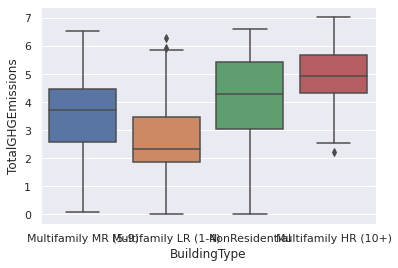

In [ ]:
sns.boxplot(y=np.log(df['TotalGHGEmissions']+1),x='BuildingType',data=df)

In [ ]:
import statsmodels.api as sm
mod=ols('TotalGHGEmissions ~ LargestPropertyUseType',data=df).fit()
sm.stats.anova_lm(mod, typ=2)

,sum_sq,df,F,PR(>F)
LargestPropertyUseType,1.337921e+06,6.0,25.077403,1.779894e-28
Residual,1.329346e+07,1495.0,NaN,NaN


LargestPropertyUseType a un effet sur les émissions de CO2.

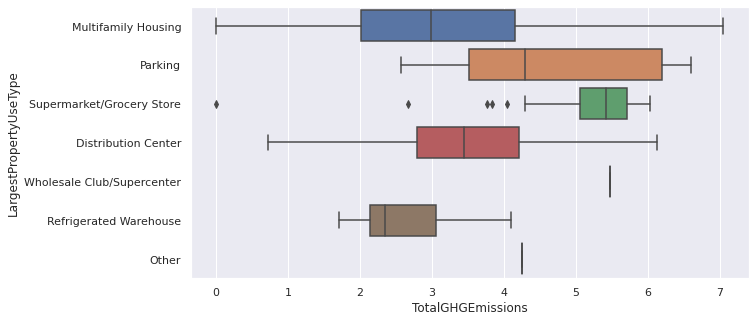

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x=np.log(df['TotalGHGEmissions']+1),y='LargestPropertyUseType',data=df)

In [ ]:
import statsmodels.api as sm
data['SiteEnergyUseWN_kBtu']=data['SiteEnergyUseWN(kBtu)']
mod=ols('SiteEnergyUseWN_kBtu ~ BuildingType',data=data).fit()
sm.stats.anova_lm(mod, typ=2)

,sum_sq,df,F,PR(>F)
BuildingType,6.934219e+16,6.0,43.359466,1.227696e-50
Residual,6.711477e+17,2518.0,NaN,NaN


Le type de batiment a un d'effet sur la consommation d'énergie.

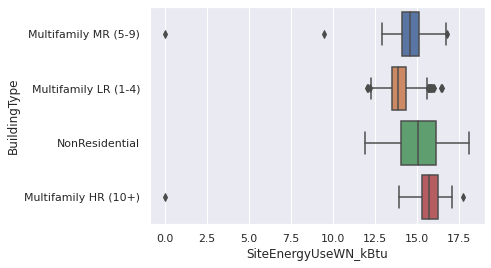

In [ ]:
df=data.loc[data['LargestPropertyUseType'].isin(['Parking', 'Supermarket/Grocery Store', 'Distribution Center',
       'Wholesale Club/Supercenter', 'Refrigerated Warehouse', 'Other',
       'Multifamily Housing']),:]
sns.boxplot(x=np.log(df['SiteEnergyUseWN_kBtu']+1),y='BuildingType',data=df)

In [ ]:
import statsmodels.api as sm
mod=ols('SiteEnergyUseWN_kBtu ~ LargestPropertyUseType',data=df).fit()
sm.stats.anova_lm(mod, typ=2)

,sum_sq,df,F,PR(>F)
LargestPropertyUseType,6.426717e+15,6.0,72.964224,6.082532e-80
Residual,2.194670e+16,1495.0,NaN,NaN


LargestPropertyUseType aun sur la consommation d'énergie.

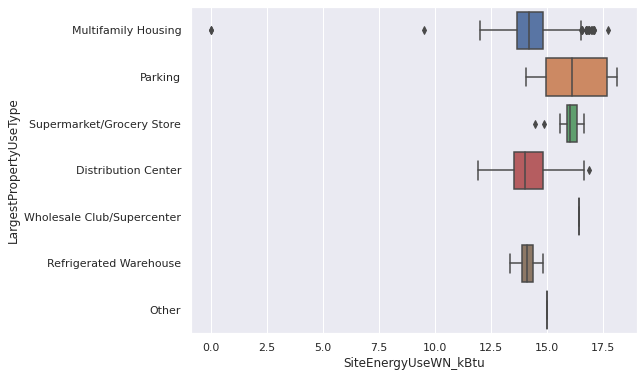

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x=np.log(df['SiteEnergyUseWN_kBtu']+1),y='LargestPropertyUseType',data=df)

## III -References et définition


**Définitions**
- **SiteEnergyUse :** The annual amount of energy consumed by the property from all sources of energy.
- **GHGEmissions :** The total amount of greenhouse gas emissions, including carbon dioxide, methane, and nitrous oxide gases released into the atmosphere as a result of energy consumption at the property, measured in metric tons of carbon dioxide equivalent. This calculation uses a GHG emissions factor from Seattle City Light's portfolio of generating resources. This uses Seattle City Light's 2015 emissions factor of 52.44 lbs CO2e/MWh. Enwave steam factor = 170.17 lbs CO2e/MMBtu. Gas factor sourced from EPA Portfolio Manager = 53.11 kg CO2e/MBtu.

*Source* : [Ville de Seattle](!https://data.seattle.gov/dataset/2015-Building-Energy-Benchmarking/h7rm-fz6m)

**Sources :**
- [Lien vers consignes](!https://openclassrooms.com/fr/projects/629/assignment)

- [Lien vers données](!https://www.kaggle.com/city-of-seattle/sea-building-energy-benchmarking#2015-building-energy-benchmarking.csv)

- [Lien vers score Star Energy](!https://www.energystar.gov/buildings/facility-owners-and-managers/existing-buildings/use-portfolio-manager/interpret-your-results/what)

- [Signification des colonnes (trouvé via recherche web)](!https://data.seattle.gov/dataset/2016-Building-Energy-Benchmarking/2bpz-gwpy)

- [Différence entre source et site](!https://www.energystar.gov/buildings/benchmark/understand_metrics/source_site_difference)
- [Définition de l'EUI](!https://www.energystar.gov/buildings/benchmark/understand_metrics/what_eui)
- [Energy Star Score](!https://www.energystar.gov/buildings/benchmark/analyze_benchmarking_results)
- [Définition des types de bâtiments](!https://portfoliomanager.energystar.gov/pm/glossary)